# DPT for hematopoiesis in mouse [(Moignard *et al.*, 2015)](http://dx.doi.org/10.1038/nbt.3154)

The following analysis has been published by [Haghverdi *et al.*, Nat. Meth. (2016)](http://dx.doi.org/10.1038/nmeth.3971) together with a Matlab implementation of Diffusion Pseudotime. The data is from [Moignard *et al.*, Nat. Biotechn. (2015)](http://dx.doi.org/10.1038/nbt.3154).

In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = './write/moignard15.h5ad'

scanpy==1.3.1+83.g641af42 anndata==0.6.10+31.g4c40622 numpy==1.14.5 scipy==1.1.0 pandas==0.23.4 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

This is single-cell qPCR data. It's already on a logrithmic scale and pretty low-dimensional. We do not have to perform extensive preprocessing.

1. Filter out a few genes.
2. Choose a 'root cell'.                                                                                                                                                           
3. Define groupnames by inspecting cellnames.                                                                                                                                    

In [3]:
adata = sc.datasets.moignard15()

... writing an h5ad cache file to speedup reading next time


Compute the neighborhood relations of single cells.

In [4]:
sc.pp.neighbors(adata, n_neighbors=5, method='gauss', knn=False)

computing neighbors
    using data matrix X directly
    finished (0:00:00.98) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


Compute branchings and diffusion pseudotime using DPT.

In [5]:
sc.tl.diffmap(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
    eigenvalues of transition matrix
    [1.0000018  0.99249375 0.9739005  0.8865169  0.86071664 0.8255125
     0.78051525 0.7599627  0.7338714  0.7300987  0.7136638  0.7079268
     0.7056841  0.6916961  0.690119  ]
    finished (0:00:02.00) --> added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns)


In [8]:
sc.tl.dpt(adata, n_branchings=1, n_dcs=10)

computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:01.05) --> added
    'dpt_pseudotime', the pseudotime (adata.obs)
    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs)


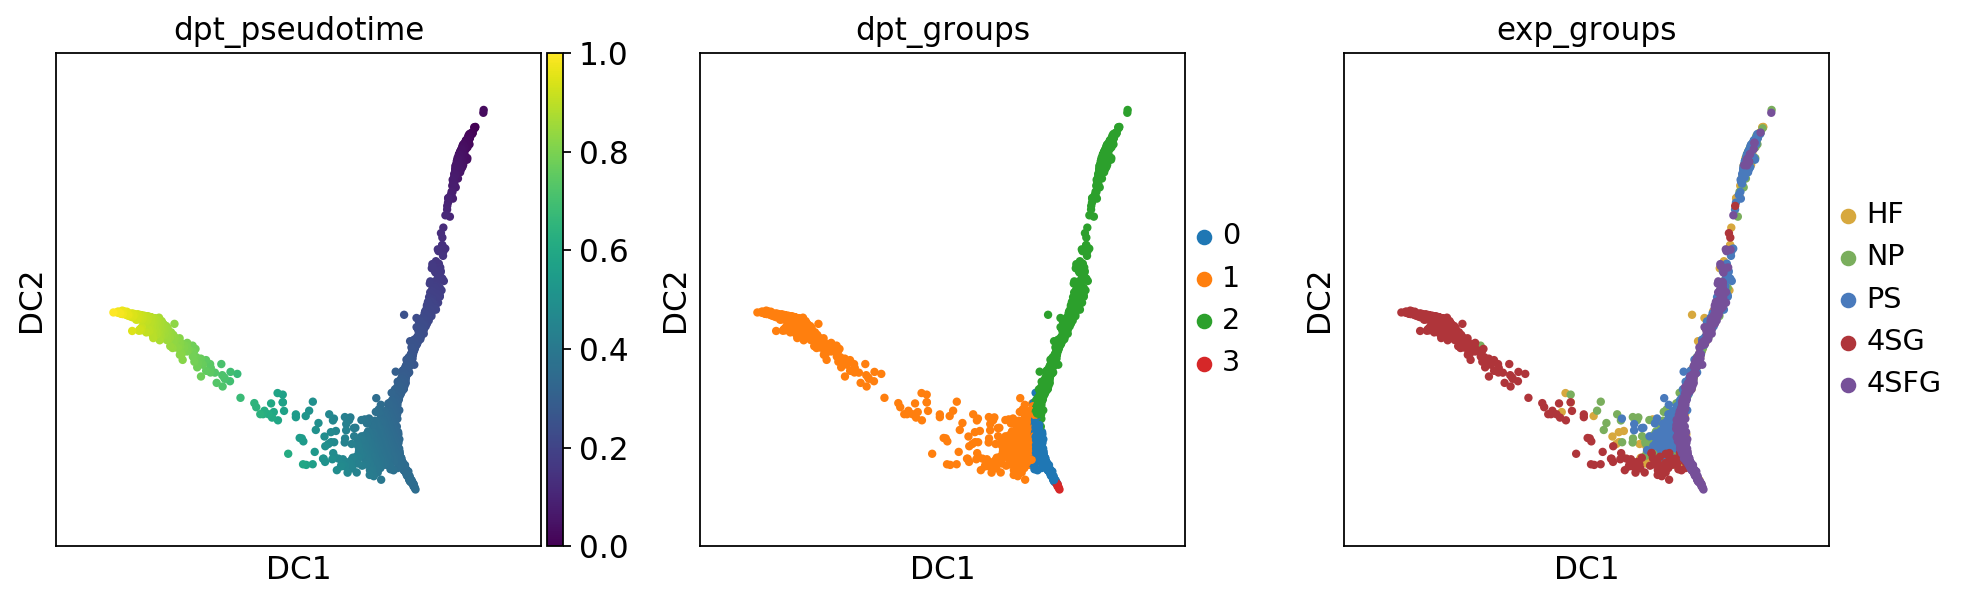

In [9]:
sc.pl.diffmap(adata, color=['dpt_pseudotime', 'dpt_groups', 'exp_groups'])

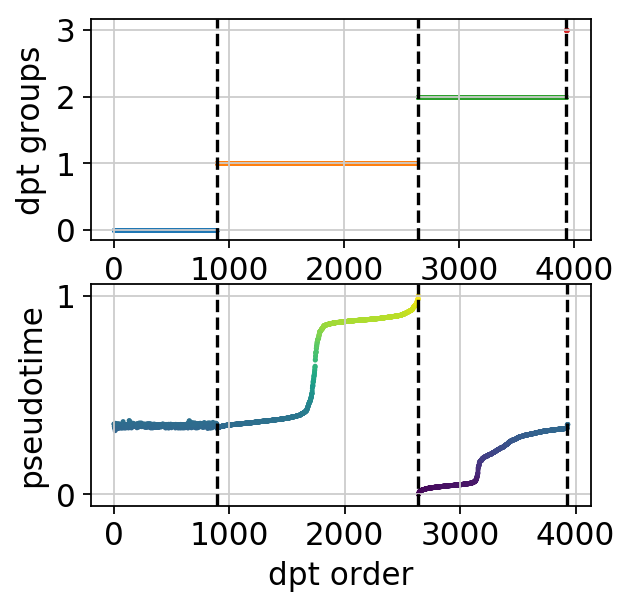

In [10]:
sc.pl.dpt_groups_pseudotime(adata)

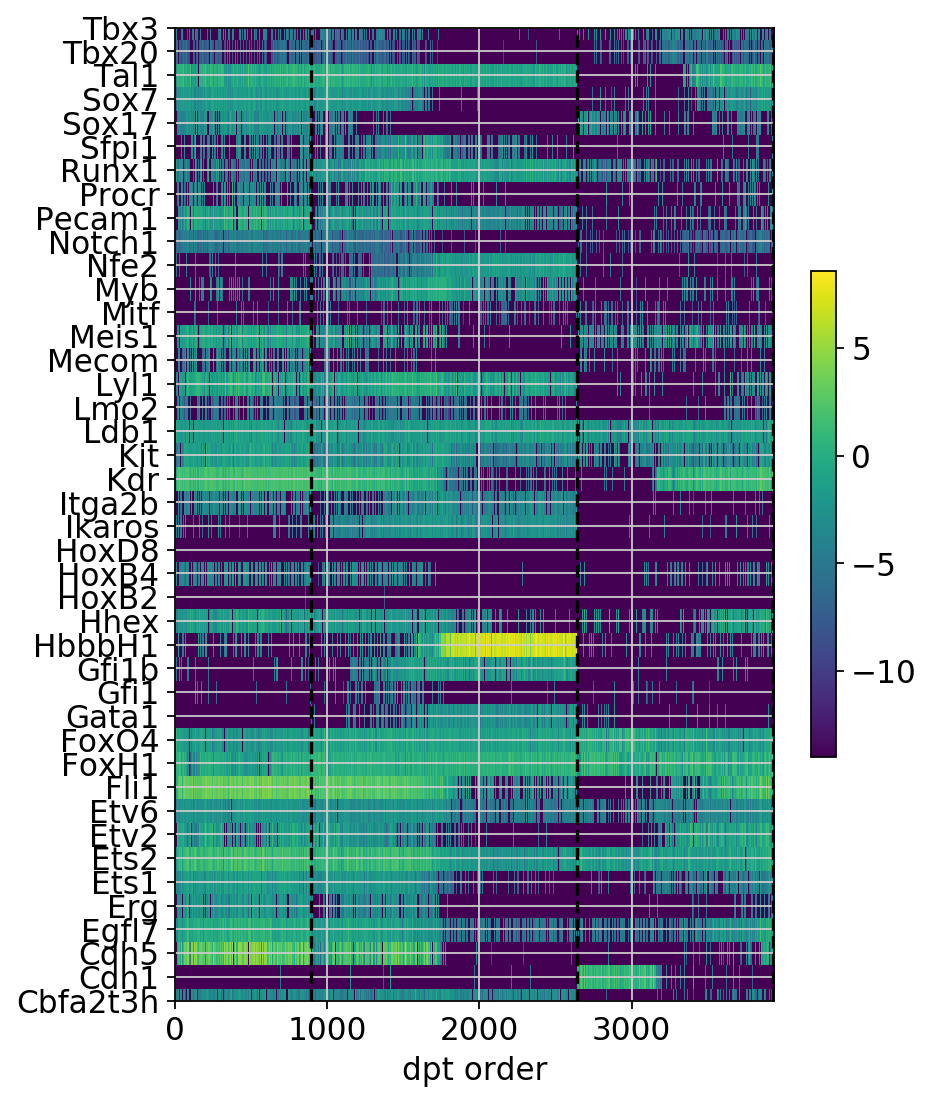

In [11]:
sc.pl.dpt_timeseries(adata)

Let us annotate the cell groups as follows.

In [13]:
adata.rename_categories('dpt_groups', ['undecided/endothelial', 'erythrocytes', 'trunk', 'endothelial'])

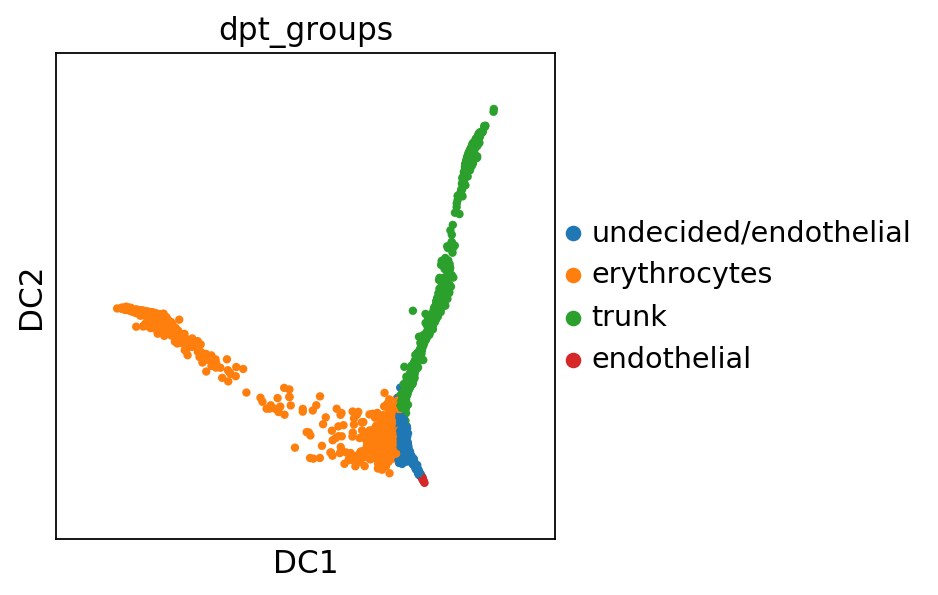

In [14]:
sc.pl.diffmap(adata, color='dpt_groups')

Save the results.

In [15]:
adata.write(results_file)

Or as csv.

In [11]:
# adata.obs.to_csv('./write/annotation.csv')

In [12]:
# To write the full object to csvs
# adata.write_csvs('./write/moignard15.csv')